# MATH 360 Worksheet 8

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

## Learning Goals

* Apply the mass balance equation to a mathematical models of mass transfer
* Apply the nondimensionalization procedure and interpret dimensionless parameters
* Approximate solutions of first order systems of differential equations with SciPy

## Prelecture Readings

* [MATH 360 > Mass Balance](http://localhost:8000/deterministic/mass/) including:
  * [Conservation of Mass](http://localhost:8000/deterministic/mass/conservation.html)
  * [Chemical Kinetics](http://localhost:8000/deterministic/mass/chemical.html)

## Mass Balance Equation

What is the **mass balance equation** and how do we use it to construct mathematical models?

## 3-Tank System

Consider a system of 3 tanks containing salt water solution (with different concentrations) such that each tank contains the same volume of solution and each flows into the others at the same constant rate. Construct a mathematical model of the system.

**Solution:**

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| mass of salt in tank 0 | $M_0$ | M | dependent variable |
| mass of salt in tank 1 | $M_1$ | M | dependent variable |
| mass of salt in tank 2 | $M_2$ | M | dependent variable |
| time | $t$ | T | independent variable |
| volume of solution in each tank | $V$ | L<sup>3</sup> | parameter |
| flow rate | $Q$ | L<sup>3</sup> T<sup>-1</sup> | parameter |

**Assumptions and Constraints**

* constant flow rate between tanks
* same volume $V$ in each tank

**Construction:**

The mass flow rate from tank $i$ to tank $j$ is $Q M_i / V$. Apply the mass balance equation to each tank:

\begin{align*}
\frac{dM_0}{dt} &= -\frac{2 Q M_0}{V} + \frac{Q M_1}{V} + \frac{Q M_2}{V} \\
\frac{dM_1}{dt} &= \frac{Q M_0}{V} - \frac{2 Q M_1}{V} + \frac{Q M_2}{V} \\
\frac{dM_2}{dt} &= \frac{Q M_0}{V} + \frac{Q M_1}{V} - \frac{2 Q M_2}{V} \\
M_0(0) &= M_{0,0} \\
M_1(0) &= M_{1,0} \\
M_2(0) &= M_{2,0}
\end{align*}

Apply the nondimensionalization procedure. Choose the same scaling factor $[M]$ for each tank since the system is symmetric. Let $M_0 = [M] M_0^*$, $M_1 = [M] M_1^*$, $M_2 = [M] M_2^*$, and $t = [t] t^*$. Make the substitution:

\begin{align*}
\frac{[M]}{[t]} \frac{dM_0}{dt} &= -\frac{2 Q [M] M^*_0}{V} + \frac{Q [M] M^*_1}{V} + \frac{Q [M] M^*_2}{V} \\
\frac{[M]}{[t]} \frac{dM_1}{dt} &= \frac{Q [M] M^*_0}{V} - \frac{2 Q [M] M^*_1}{V} + \frac{Q [M] M^*_2}{V} \\
\frac{[M]}{[t]} \frac{dM_2}{dt} &= \frac{Q [M] M^*_0}{V} + \frac{Q [M] M^*_1}{V} - \frac{2 Q [M] M^*_2}{V} \\
[M] M^*_0(0) &= M_{0,0} \\
[M] M^*_1(0) &= M_{1,0} \\
[M] M^*_2(0) &= M_{2,0}
\end{align*}

Simplfy the equations:

\begin{align*}
\frac{dM^*_0}{dt^*} &= -\frac{2 Q [t] M^*_0}{V} + \frac{Q [t] M^*_1}{V} + \frac{Q [t] M^*_2}{V} \\
\frac{dM^*_1}{dt^*} &= \frac{Q [t] M^*_0}{V} - \frac{2 Q [t] M^*_1}{V} + \frac{Q [t] M^*_2}{V} \\
\frac{dM^*_2}{dt^*} &= \frac{Q [t] M^*_0}{V} + \frac{Q [t] M^*_1}{V} - \frac{2 Q [t] M^*_2}{V} \\
M^*_0(0) &= \frac{M_{0,0}}{[M]} \\
M^*_1(0) &= \frac{M_{1,0}}{[M]} \\
M^*_2(0) &= \frac{M_{2,0}}{[M]}
\end{align*}

Choose $[M] = M_{0,0}$ and $[t] = V/Q$ and write

\begin{align*}
\frac{dM^*_0}{dt} &= -2 M^*_0 + M^*_1 + M^*_2 \\
\frac{dM^*_1}{dt} &= M^*_0 - 2 M^*_1 + M^*_2 \\
\frac{dM^*_2}{dt} &= M^*_0 + M^*_1 - 2 M^*_2 \\
M^*_0(0) &= 1 \\
M^*_1(0) &= \mu_1 \\
M^*_2(0) &= \mu_2
\end{align*}

where $\mu_1 = \frac{M_{1,0}}{M_{0,0}}$ and $\mu_2 = \frac{M_{2,0}}{M_{0,0}}$.

**Analysis:**

The time scale $[t]$ is the time required to fill volume $V$ at rate $Q$ and the masses of salt are measured in multiples of the initial mass in tank 0. Note that the total mass of salt in the system remains constant $1 + \mu_1 + \mu_2$ and the system is symmetric therefore the steady state solution is an equal mass of salt in each tank:

$$
\frac{1 + \mu_1 + \mu_2}{3}
$$

Plot some solutions:

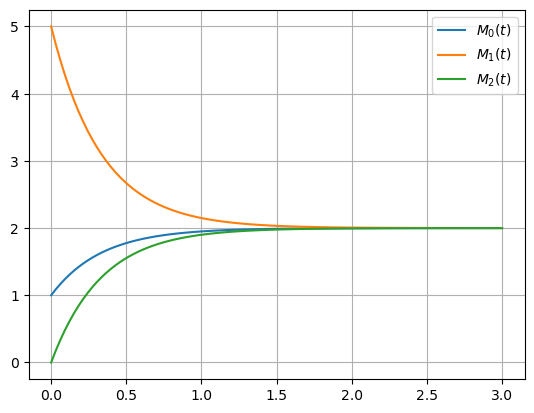

In [3]:
def f(M,t):
    dMdt = np.array([0.,0.,0.])
    dMdt[0] = -2*M[0] + M[1] + M[2]
    dMdt[1] = -2*M[1] + M[0] + M[2]
    dMdt[2] = -2*M[2] + M[0] + M[1]
    return dMdt

M0 = [1,5,0]
t = np.linspace(0,3,100)
M = spi.odeint(f,M0,t)
plt.plot(t,M[:,0],t,M[:,1],t,M[:,2]), plt.grid(True)
plt.legend(['$M_0(t)$','$M_1(t)$','$M_2(t)$'])
plt.show()

## Law of Mass Action

What is the **law of mass action** and how do we use it to construct mathematical models?

## Hydrogenation of Ethylene

Create a mathematical model of the hydrogenation of ethylene ($C_2H_4$) into ethane ($C_2H_6$) given by the reactions

$$
\begin{align*}
H_2 & \overset{k_1}{\underset{k_{-1}}{\rightleftharpoons}} 2H \\
C_2H_4 + H & \overset{k_2}{\rightarrow} C_2H_5 \\
C_2H_5 + H & \overset{k_3}{\rightarrow} C_2H_6 \\
\end{align*}
$$

**Solution:**

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| concentration of $H_2$ | $C_0$ | N L<sup>-3</sup> | dependent variable |
| concentration of $H$ | $C_1$ | N L<sup>-3</sup> | dependent variable |
| concentration of $C_2 H_4$ | $C_2$ | N L<sup>-3</sup> | dependent variable |
| concentration of $C_2 H_5$ | $C_3$ | N L<sup>-3</sup> | dependent variable |
| concentration of $C_2 H_6$ | $C_4$ | N L<sup>-3</sup> | dependent variable |
| time | $t$ | T | independent variable |
| reaction coefficient | $k_1$ | T<sup>-1</sup> | parameter |
| reaction coefficient | $k_{-1}$ | (N L<sup>-3</sup>)<sup>-1</sup> T<sup>-1</sup> | parameter |
| reaction coefficient | $k_2$ | (N L<sup>-3</sup>)<sup>-1</sup> T<sup>-1</sup> | parameter |
| reaction coefficient | $k_3$ | (N L<sup>-3</sup>)<sup>-1</sup> T<sup>-1</sup> | parameter |

**Assumptions and Constraints**

* reaction starts with $H_2$ and $C_2 H_4$ only
* reaction coefficients are all positive

**Construction**

Apply the mass balance equation to each reactant and product:

\begin{align*}
\frac{dC_0}{dt} &= -k_1 C_0 + k_{-1} C_1^2 \\
\frac{dC_1}{dt} &= -2k_{-1} C_1^2 + 2k_1 C_0 - k_2 C_1 C_2 - k_3 C_1 C_3  \\
\frac{dC_2}{dt} &= -k_2 C_1 C_2 \\
\frac{dC_3}{dt} &= -k_3 C_1 C_3 + k_2 C_1 C_2 \\
\frac{dC_4}{dt} &= k_3 C_1 C_3 \\
C_0(0) &= C_{0,0} \quad C_2(0) = C_{2,0} \quad C_1(0) = C_3(0) = C_4(0) = 0
\end{align*}

Apply the nondimensionalization procedure. Let $C_0 = [C_0] C_0^*$, $C_1 = [C_1] C_1^*$, $C_2 = [C_2] C_2^*$, $C_3 = [C_3] C_3^*$, and $t = [t] t^*$. Make the substitutions:

$$
\begin{align*}
\frac{[C_0]}{[t]} \frac{dC^*_0}{dt^*} &= -k_1 [C_0] C^*_0 + k_{-1} [C_1]^2 C_1^{*2} \\
\frac{[C_1]}{[t]} \frac{dC^*_1}{dt^*} &= -2k_{-1} [C_1]^2 C_1^{*2} + 2k_1 [C_0]C^*_0 - k_2[C_1][C_2] C_1^* C_2^* - k_3[C_1][C_3] C_1^* C_3^*  \\
\frac{[C_2]}{[t]} \frac{dC^*_2}{dt^*} &= -k_2 [C_1][C_2]C_1^* C_2^* \\
\frac{[C_3]}{[t]} \frac{dC^*_3}{dt^*} &= -k_3 [C_1][C_3]C_1^* C_3^* + k_2 [C_1][C_2]C_1^* C_2^* \\
\frac{[C_4]}{[t]} \frac{dC^*_4}{dt^*} &= k_3 [C_1][C_3]C_1^* C_3^* \\
[C_0]C_0^*(0) &= C_{0,0} \quad [C_2]C_2^*(0) = C_{2,0} \quad C_1^*(0) = C_3^*(0) = C_4^*(0) = 0
\end{align*}
$$

We choose the same scaling factor for the concentrations $[C_0] = [C_1] = [C_2] = [C_3] = [C_4] = [C]$ and simplify

$$
\begin{align*}
\frac{dC^*_0}{dt^*} &= -k_1 [t] C^*_0 + k_{-1} [t] [C] C_1^{*2} \\
\frac{dC^*_1}{dt^*} &= -2k_{-1} [t] [C] C_1^{*2} + 2 k_1 [t] C^*_0 - k_2[t] [C] C^*_1 C^*_2 - k_3 [t] [C] C^*_1 C^*_3  \\
\frac{dC^*_2}{dt^*} &= -k_2 [t][C] C^*_1 C^*_2 \\
\frac{dC^*_3}{dt^*} &= -k_3 [t] [C] C^*_1 C^*_3 + k_2 [t] [C] C^*_1 C^*_2 \\
\frac{dC^*_4}{dt^*} &= k_3 [t] [C] C^*_1 C^*_3 \\
C^*_0(0) &= \frac{C_{0,0}}{[C]} \quad C^*_2(0) = \frac{C_{2,0}}{[C]} \quad C^*_1(0) = C^*_3(0) = C^*_4(0) = 0
\end{align*}
$$

Choose $[t] = \frac{1}{k_1}$ and $[C] = \frac{k_1}{k_{-1}}$ and write

$$
\begin{align*}
\frac{dC^*_0}{dt^*} &= - C^*_0 + C_1^{*2} \\
\frac{dC^*_1}{dt^*} &= -2 C_1^{*2} + 2 C^*_0 - \kappa_2 C^*_1 C^*_2 - \kappa_3 C^*_1 C^*_3  \\
\frac{dC^*_2}{dt^*} &= -\kappa_2 C^*_1 C^*_2 \\
\frac{dC^*_3}{dt^*} &= -\kappa_3 C^*_1 C^*_3 + \kappa_2 C^*_1 C^*_2 \\
\frac{dC^*_4}{dt^*} &= \kappa_3 C^*_1 C^*_3 \\
C^*_0(0) &= \gamma_0 \quad C^*_2(0) = \gamma_2 \quad C^*_1(0) = C^*_3(0) = C^*_4(0) = 0
\end{align*}
$$

where $\kappa_2 = \frac{k_2}{k_{-1}}$ and $\kappa_3 = \frac{k_3}{k_{-1}}$. $\gamma_0 = \frac{k_{-1}C_{0,0}}{k_1}$ and $\gamma_2 = \frac{{k_{-1}C_{2,0}}}{k_1}$.

**Analysis**

Plot some solutions:

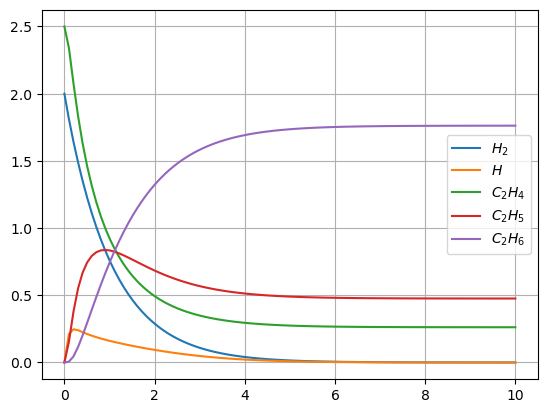

In [9]:
k2 = 5; k3 = 6;
c0 = 2; c2 = 2.5;

def f(C,t):
    dCdt = np.array([0.,0.,0.,0.,0.])
    dCdt[0] = -C[0] + C[1]**2
    dCdt[1] = -2*C[1]**2 + 2*C[0] - k2*C[1]*C[2] - k3*C[1]*C[3]
    dCdt[2] = -k2*C[1]*C[2]
    dCdt[3] = -k3*C[1]*C[3] + k2*C[1]*C[2]
    dCdt[4] = k3*C[1]*C[3]
    return dCdt

C0 = [c0,0,c2,0,0]
t = np.linspace(0,10,100)
C = spi.odeint(f,C0,t)
plt.plot(t,C[:,0],t,C[:,1],t,C[:,2],t,C[:,3],t,C[:,4])
plt.grid(True), plt.legend(['$H_2$','$H$','$C_2H_4$','$C_2H_5$','$C_2H_6$'])
plt.show()

## Epidemiology as Chemical Reactions

We can construct the familiar [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) in epidemiology in terms of "chemical reactions" and the law of mass action. In particular, the first reaction is a susceptible person interacts with an infectious person to create 2 infectious persons, and the second reaction in the system is that an infectious person becomes a recovered person:

$$
\begin{align*}
S + I & \overset{k_1}{\rightarrow} 2I \\
I & \overset{k_2}{\rightarrow} R
\end{align*}
$$

Apply the law of mass action to find the system of equations:

$$
\begin{align*}
\frac{dS}{dt} &= -k_1 SI \\
\frac{dI}{dt} &= k_1SI - k_2 I \\
\frac{dR}{dt} &= k_2 I
\end{align*}
$$

Note that $k_1 = \beta/N$ and $k_2 = \gamma$ in the usual formulation of the model (where $N = S + I + R$).

Apply the same idea to construct a more complex model including vaccination and reinfection. Represent the system as a system of reactions:

$$
\begin{align*}
S + I & \overset{k_1}{\rightarrow} 2I \\
I & \overset{k_2}{\rightarrow} R \\
R & \overset{k_3}{\rightarrow} S \\
S & \overset{k_4}{\rightarrow} V
\end{align*}
$$

where $S$ is the susceptible population, $I$ is the infectious population, $R$ is the recovered population, $V$ is the vaccinated population.

**Solution:**

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| susceptible population | $S$ | N | dependent variable |
| infectious population | $I$ | N | dependent variable |
| recovered population | $R$ | N | dependent variable |
| vaccinated population | $V$ | N | dependent variable |
| time | $t$ | T | independent variable |
| reaction coefficient | $k_1$ | N<sup>-1</sup> T<sup>-1</sup> | parameter |
| reaction coefficient | $k_2$ | T<sup>-1</sup> | parameter |
| reaction coefficient | $k_3$ | T<sup>-1</sup> | parameter |
| reaction coefficient | $k_4$ | T<sup>-1</sup> | parameter |

**Assumptions and Constraints**

* Assume the system begins with only susceptible and infectious persons

**Construction**

Apply the mass balance equation to each population

$$
\begin{align*}
\frac{dS}{dt} &= -k_1 SI + k_3 R - k_4 S \\
\frac{dI}{dt} &= k_1 SI - k_2 I \\
\frac{dR}{dt} &= k_2 I - k_3 R \\
\frac{dV}{dt} &= k_4 S \\
S(0) &= S_0 \quad I(0) = I_0 \quad R(0) = V(0) = 0
\end{align*}
$$

Apply the nondimensionalization procedure. Let $t = [t] t^*$, $S = [S]S^*$, $I = [I]I^*$, $R = [R]R^*$, $V = [V]V^*$. Make the substitutions:

$$
\begin{align*}
\frac{[S]}{[t]} \frac{dS^*}{dt^*} &= -k_1 [S][I] S^*I^* + k_3 [R] R^* - k_4 [S] S^* \\
\frac{[I]}{[t]} \frac{dI^*}{dt^*} &= k_1 [S][I]S^*I^* - k_2 [I]I^* \\
\frac{[R]}{[t]} \frac{dR^*}{dt^*} &= k_2 [I]I^* - k_3 [R]R^* \\
\frac{[V]}{[t]} \frac{dV^*}{dt^*} &= k_4 [S]S^* \\
[S]S^*(0) &= S_0 \quad [I]I^*(0) = I_0 \quad R^*(0) = V^*(0) = 0
\end{align*}
$$

It makes sense to scale the populations by the total population $P = S_0 + I_0$. Therefore let $[S] = [I] = [R] = [V] = P$ and $[t] = \frac{1}{k_1 P}$ and write:

$$
\begin{align*}
\frac{dS^*}{dt^*} &= -S^*I^* + \kappa_3 R^* - \kappa_4 S^* \\
\frac{dI^*}{dt^*} &= S^*I^* - \kappa_2 I^* \\
\frac{dR^*}{dt^*} &= \kappa_2 I^* - \kappa_3 R^* \\
\frac{dV^*}{dt^*} &= \kappa_4 S^* \\
S^*(0) &= \sigma_0 \quad I^*(0) = 1 - \sigma_0 \quad R^*(0) = V^*(0) = 0
\end{align*}
$$

where

$$
\kappa_2 = \frac{k_2}{k_1 P}
\hspace{10mm}
\kappa_3 = \frac{k_3}{k_1 P}
\hspace{10mm}
\kappa_4 = \frac{k_4}{k_1 P}
\hspace{10mm}
\sigma_0 = \frac{S_0}{S_0 + I_0}
$$

**Analysis**

The dimensionless parameters measure the reaction rartes relative to the infection rate $k_1 P$. Plot some solutions:

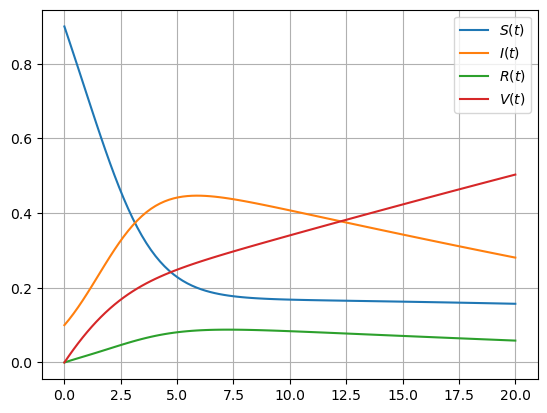

In [21]:
k2 = 0.2; k3 = 1; k4 = 0.1;
s0 = 0.9; 
def f(u,t):
    # u[0] = S, u[1] = I, u[2] = R, u[3] = V
    dudt = np.array([0.,0.,0.,0.])
    dudt[0] = -u[0]*u[1] + k3*u[2] - k4*u[0]
    dudt[1] = u[0]*u[1] - k2*u[1]
    dudt[2] = k2*u[1] - k3*u[2]
    dudt[3] = k4*u[0]
    return dudt

u0 = [s0,1-s0,0,0]
t = np.linspace(0,20,100)
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0],t,u[:,1],t,u[:,2],t,u[:,3])
plt.grid(True), plt.legend(['$S(t)$','$I(t)$','$R(t)$','$V(t)$'])
plt.show()

## Solution Draining from a Tank

Suppose a tank contains a salt water solution. The solution is drained from the bottom of the tank at a rate proportional to the pressure $\rho g h$ where $\rho$ is the density of the solution and $h$ is the height of the volume of solution in the tank. Suppose pure water is also flowing into the top of the tank at a rate that may change over time. Construct a mathematical model of the system.

**Solution:**

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| mass of salt | $M$ | M | dependent variable |
| volume of solution in the tank | $V$ | L<sup>3</sup> | dependent variable |
| height of solution in the tank | $h$ | L | dependent variable |
| density of the solution | $\rho$ | M L<sup>-3</sup> | dependent variable |
| time | $t$ | T | independent variable |
| density of water | $\rho_0$ | M L<sup>-3</sup> | parameter |
| flow rate of water | $Q$ | L<sup>3</sup> T<sup>-1</sup> | input |
| initial volume of solution | $V_0$ | L<sup>3</sup> | parameter |
| initial height of solution | $h_0$ | L | parameter |
| initial mass of salt | $M_0$ | M | parameter |
| cross-sectional area of tank | $A$ | L<sup>2</sup> | parameter |
| constant of gravity | $g$ | L T<sup>-2</sup> | parameter |
| flow rate constant | $\alpha$ | T L<sup>4</sup> M<sup>-1</sup> | parameter |

**Assumptions and Constraints**

* adding salt to water does not change its volume
* density of solution is $\rho = \rho_0 + M/V$
* cross-sectional area of the tank is constant
* flow rate out is $\alpha \rho g h$ for some constant $\alpha$ with dimenions T L<sup>4</sup> M<sup>-1</sup>.

**Construction**

The height of solution $h(t)$ and the density of the solution $\rho(t)$ is changing over time. Apply the balance equation to the volume $V(t) = A h(t)$ of solution in the tank

$$
A \frac{dh}{dt} = Q(t) - \alpha \rho g h = Q(t) - \alpha \left( \rho_0 + \frac{M}{hA} \right) g h
= Q(t) - \alpha \rho_0 g h - \frac{ \alpha g M}{A}
$$

$$
\frac{dh}{dt} = \frac{Q(t)}{A} - \frac{ \alpha \rho_0 g h}{A} - \frac{ \alpha g M}{A^2}
$$

Apply the mass balance equation to the mass of salt in the tank:

$$
\frac{dM}{dt} = -\alpha \rho g h \frac{M}{hA} = -\frac{\alpha \left( \rho_0 + \frac{M}{hA} \right) g M}{A}
= -\frac{\alpha \rho_0 g M}{A} - \frac{\alpha g M^2}{hA^2}
$$

Therefore we have a system:

\begin{align*}
\frac{dh}{dt} &= \frac{Q(t)}{A} - \frac{ \alpha \rho_0 g h}{A} - \frac{ \alpha g M}{A^2} \\
\frac{dM}{dt} &= -\frac{\alpha \rho_0 g M}{A} - \frac{\alpha g M^2}{hA^2} \\
h(0) &= h_0 \\
M(0) &= M_0
\end{align*}

Apply nondimensionalization procedure. Let $h = [h]h^*$, $M = [M] M^*$, $t = [t] t^*$, and $Q(t) = [Q] Q^*(t^*)$. Make the substitutions:

\begin{align*}
\frac{[h]}{[t]} \frac{dh^*}{dt^*} &= \frac{[Q] Q^*(t^*)}{A} - \frac{ \alpha \rho_0 g [h]h^*}{A} - \frac{ \alpha g [M]M^*}{A^2} \\
\frac{[M]}{[t]} \frac{dM^*}{dt^*} &= -\frac{\alpha \rho_0 g [M]M^*}{A} - \frac{\alpha g [M]^2 M^{*2}}{[h]h^*A^2} \\
[h] h^*(0) &= h_0 \\
[M] M^*(0) &= M_0
\end{align*}

Simplify

\begin{align*}
\frac{dh^*}{dt^*} &= \frac{[Q][t]}{A[h]} Q^*(t^*) - \frac{ \alpha \rho_0 g [t]}{A} h^* - \frac{ \alpha g [t][M]}{A^2 [h]} M^* \\
\frac{dM^*}{dt^*} &= -\frac{\alpha \rho_0 g [t]}{A} M^* - \frac{\alpha g [t][M]}{A^2 [h]} \frac{M^{*2}}{h^*} \\
h^*(0) &= \frac{h_0}{[h]} \\
M^*(0) &= \frac{M_0}{[M]}
\end{align*}

Choose scaling factors

$$
[t] = \frac{A}{\alpha \rho_0 g}
\quad
[h] = h_0
\quad
[Q] = \alpha \rho_0 g h_0
\quad
[M] = \rho_0 h_0 A
$$

and make subsitutions

\begin{align*}
\frac{dh^*}{dt^*} &= Q^*(t^*) - h^* - M^* \\
\frac{dM^*}{dt^*} &= - M^* - \frac{M^{*2}}{h^*} \\
h^*(0) &= 1 \\
M^*(0) &= \mu
\end{align*}

where $\mu = \frac{M_0}{\rho_0 h_0 A}$.

**Analysis:**

Note that $\mu$ is the ratio of the initial salt concentration $M_0/V_0$ to the density of pure water. Pure water has density $\rho_0 = 1000 kg/m^3$. Seawater has salt concentration $35 \ g/L$ = $35 kg/m^3$ which corresponds to $\mu = 0.035$.

The scaling factor $[Q]$ is the flow rate of pure water draining from the tank with the initial volume.

Plot some solutions:

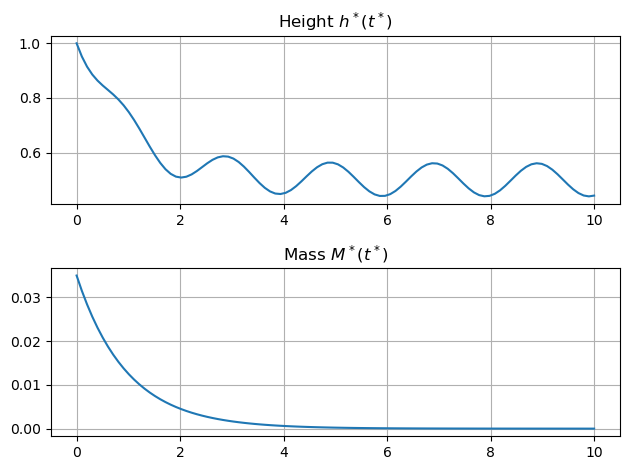

In [22]:
mu = 0.035
Q = lambda t: 0.2*np.sin(np.pi*t) + 1/2

# Let u[0] = h and u[1] = M
f = lambda u,t: np.array([Q(t) - u[0] - u[1], -u[1] - u[1]**2/u[0]])
u0 = [1,mu]
t = np.linspace(0,10,100)
u = spi.odeint(f,u0,t)
plt.subplot(2,1,1)
plt.plot(t,u[:,0]), plt.grid(True), plt.title('Height $h^*(t^*)$')
plt.subplot(2,1,2)
plt.plot(t,u[:,1]), plt.grid(True), plt.title('Mass $M^*(t^*)$'), plt.tight_layout()
plt.show()